# Analysis & Plot Asphalt Mixture Test Results.

This notebook include the codes to analyze and plot the results of the asphalt mixture tests, including IDEAL-CT, DCT and HWTT.

Author: Farhad Abdollahi (farhad.abdollahi.ctr@dot.gov)

Date: 04/23/2025

Update: 05/13/2025
_____

In [1]:
# Importing the required libraries.
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind, t

In [2]:
# User defined variables. 
MainDataFile = './Data.xlsx'

_______

## Plot 08: IDEAL-CT test. 

Plot the CT-Index values as bar plot, as well as plotting the interaction diagram. 

Reading the IDEAL-CT outputs from the `Data.xlsx` file. 

In [3]:
IDEALCT = pd.read_excel(MainDataFile, sheet_name='IDEAL-CT', usecols='A:G,K:O,S:W', skiprows=2, 
                        names=['Age', 'ID', 
                               'CT-r1',   'CT-r2',   'CT-r3',   'CT-r4',   'CT-r5', 
                               'lm75-r1', 'lm75-r2', 'lm75-r3', 'lm75-r4', 'lm75-r5', 
                               'Gf-r1',   'Gf-r2',   'Gf-r3',   'Gf-r4',   'Gf-r5'], nrows=7)
IDEALCT['CT-Mean']  = IDEALCT[['CT-r1',   'CT-r2',   'CT-r3',   'CT-r4',   'CT-r5']].mean(axis=1)
IDEALCT['CT-Std']   = IDEALCT[['CT-r1',   'CT-r2',   'CT-r3',   'CT-r4',   'CT-r5']].std(axis=1)
IDEALCT['lm-Mean']  = IDEALCT[['lm75-r1', 'lm75-r2', 'lm75-r3', 'lm75-r4', 'lm75-r5']].mean(axis=1)
IDEALCT['lm-Std']   = IDEALCT[['lm75-r1', 'lm75-r2', 'lm75-r3', 'lm75-r4', 'lm75-r5']].std(axis=1)
IDEALCT['Gf-Mean']  = IDEALCT[['Gf-r1',   'Gf-r2',   'Gf-r3',   'Gf-r4',   'Gf-r5']].mean(axis=1)
IDEALCT['Gf-Std']   = IDEALCT[['Gf-r1',   'Gf-r2',   'Gf-r3',   'Gf-r4',   'Gf-r5']].std(axis=1)
IDEALCT

,Age,ID,CT-r1,CT-r2,CT-r3,CT-r4,CT-r5,lm75-r1,lm75-r2,lm75-r3,...,Gf-r2,Gf-r3,Gf-r4,Gf-r5,CT-Mean,CT-Std,lm-Mean,lm-Std,Gf-Mean,Gf-Std
0,STA,40RAP-B,193.000,227.7980,197.395,194.780,153.650,4.067917,3.056399,2.853272,...,11179.705342,10377.296990,10224.750617,10230.877922,193.32460,26.368925,3.017564,0.659998,10944.277866,1062.655179
1,STA,40RAP-P,192.528,124.0810,145.116,199.509,193.265,2.857547,2.252684,2.853272,...,10230.877922,10377.296990,11467.378362,11798.004443,170.89980,34.070779,2.606075,0.260488,10819.661667,753.817529
2,STA,20RAP,122.374,92.7837,178.127,174.908,159.615,1.715733,1.390740,2.638742,...,10007.297251,10125.698533,10675.202452,10765.092836,145.56154,36.886265,2.085393,0.520389,10454.401744,358.092305
3,LTA,40RAP-B,110.230,114.1700,89.940,86.590,74.090,1.622882,1.843562,1.253430,...,9289.237371,10763.387842,9234.443959,9019.747899,95.00400,16.830044,1.471730,0.259995,9698.947570,744.490788
4,LTA,40RAP-P,86.915,89.4500,107.400,83.123,99.600,1.325797,1.407680,1.504363,...,9531.746951,10709.717536,9906.745698,10219.952691,93.29760,9.970732,1.391662,0.099921,10040.339867,447.104304
5,LTA,20RAP,72.890,79.0700,71.020,64.910,66.410,1.101455,1.163229,1.039923,...,10675.202452,10765.092836,10106.671593,10435.535493,70.86000,5.629289,1.044519,0.089475,10536.244004,270.533539


Plot the CT indices as a bar plot. 

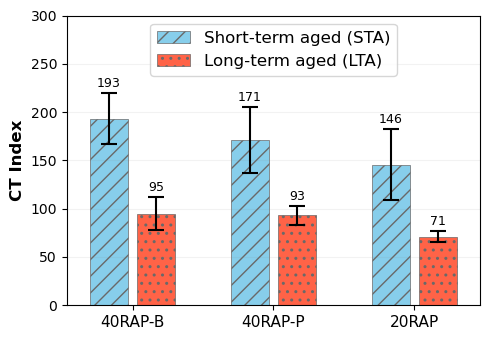

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
ax.bar([1, 4, 7], height=IDEALCT['CT-Mean'].to_numpy()[:3], yerr=IDEALCT['CT-Std'].to_numpy()[:3], width=0.8, 
          edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Short-term aged (STA)',
          error_kw={'capsize': 6, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar([2, 5, 8], height=IDEALCT['CT-Mean'].to_numpy()[3:], yerr=IDEALCT['CT-Std'].to_numpy()[3:], width=0.8, 
          edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Long-term aged (LTA)',
          error_kw={'capsize': 6, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 300])
ax.set_xticks([1.5, 4.5, 7.5])
ax.set_xticklabels(['40RAP-B', '40RAP-P', '20RAP'], fontsize=11, color='k', rotation=0)
ax.set_ylabel('CT Index', fontsize=12, fontweight='bold', color='k')
for i in range(3):
    ax.text([1, 4, 7][i], IDEALCT['CT-Mean'].to_numpy()[i]   + IDEALCT['CT-Std'].to_numpy()[i]   + 3, f"{IDEALCT['CT-Mean'].to_numpy()[i]:.0f}", 
            ha='center', va='bottom', fontsize=9)
    ax.text([2, 5, 8][i], IDEALCT['CT-Mean'].to_numpy()[i+3] + IDEALCT['CT-Std'].to_numpy()[i+3] + 3, f"{IDEALCT['CT-Mean'].to_numpy()[i+3]:.0f}", 
            ha='center', va='bottom', fontsize=9)
ax.set_xlim([0.1, 8.9])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=12, ncol=1, loc='upper center')
fig.tight_layout()
# fig.savefig('../_Figures/Figure08_IDEALCT_CTIndex.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure08_IDEALCT_CTIndex.pdf', format='pdf')
# fig.savefig('../_Figures/Figure08_IDEALCT_CTIndex.svg', format='svg')

Plot the interaction diagram. 

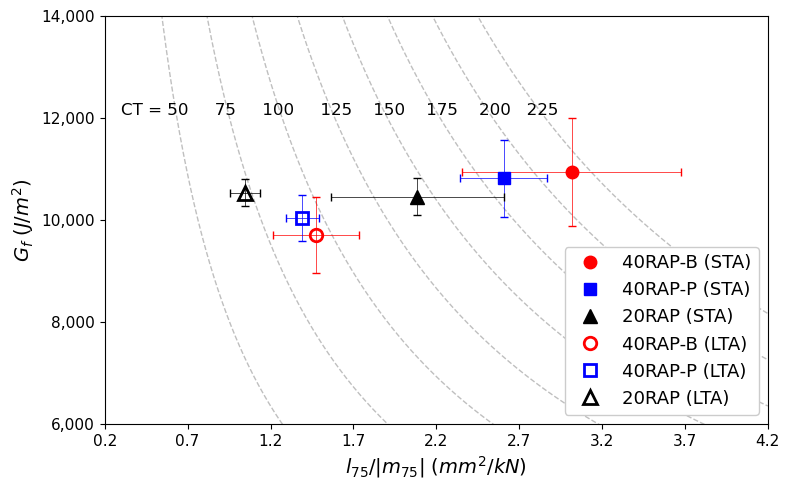

In [5]:
# Plot the interaction diagram. 
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
# Plot the guide lines. 
Diameter = 6 * 2.54 * 10
LM = np.linspace(0.2, 6, num=10000)
for CT in [50, 75, 100, 125, 150, 175, 200, 225]:
    Gf = CT / LM * Diameter
    ax.plot(LM, Gf, ls='--', lw=1, color='gray', alpha=0.5)
# ----------------------------------------------------------------------------------------------------------------------
# Plot the points: 40RAP-B (STA). 
ax.plot(IDEALCT.loc[0, 'lm-Mean'], IDEALCT.loc[0, 'Gf-Mean'], 
        ls='', marker='o', ms=9, color='r', markerfacecolor='r', label='40RAP-B (STA)')
ax.errorbar(IDEALCT.loc[0, 'lm-Mean'], IDEALCT.loc[0, 'Gf-Mean'], xerr=IDEALCT.loc[0, 'lm-Std'], yerr=IDEALCT.loc[0, 'Gf-Std'], 
            fmt='', ecolor='r', capsize=3, markersize=6, color='r', lw=0.5)
# Plot the points: 40RAP-P (STA). 
ax.plot(IDEALCT.loc[1, 'lm-Mean'], IDEALCT.loc[1, 'Gf-Mean'], 
        ls='', marker='s', ms=9, color='b', markerfacecolor='b', label='40RAP-P (STA)')
ax.errorbar(IDEALCT.loc[1, 'lm-Mean'], IDEALCT.loc[1, 'Gf-Mean'], xerr=IDEALCT.loc[1, 'lm-Std'], yerr=IDEALCT.loc[1, 'Gf-Std'], 
            fmt='', ecolor='b', capsize=3, markersize=6, color='b', lw=0.5)
# Plot the points: 20RAP (STA). 
ax.plot(IDEALCT.loc[2, 'lm-Mean'], IDEALCT.loc[2, 'Gf-Mean'], 
        ls='', marker='^', ms=10, color='k', markerfacecolor='k', label='20RAP (STA)')
ax.errorbar(IDEALCT.loc[2, 'lm-Mean'], IDEALCT.loc[2, 'Gf-Mean'], xerr=IDEALCT.loc[2, 'lm-Std'], yerr=IDEALCT.loc[2, 'Gf-Std'], 
            fmt='', ecolor='k', capsize=3, markersize=6, color='k', lw=0.5)
# Plot the points: 40RAP-B (LTA). 
ax.plot(IDEALCT.loc[3, 'lm-Mean'], IDEALCT.loc[3, 'Gf-Mean'], 
        ls='', marker='o', ms=9, color='r', markerfacecolor='none', markeredgewidth=2, label='40RAP-B (LTA)')
ax.errorbar(IDEALCT.loc[3, 'lm-Mean'], IDEALCT.loc[3, 'Gf-Mean'], xerr=IDEALCT.loc[3, 'lm-Std'], yerr=IDEALCT.loc[3, 'Gf-Std'], 
            fmt='', ecolor='r', capsize=3, markersize=6, color='r', lw=0.5)
# Plot the points: 40RAP-P (STA). 
ax.plot(IDEALCT.loc[4, 'lm-Mean'], IDEALCT.loc[4, 'Gf-Mean'], 
        ls='', marker='s', ms=9, color='b', markerfacecolor='none', markeredgewidth=2, label='40RAP-P (LTA)')
ax.errorbar(IDEALCT.loc[4, 'lm-Mean'], IDEALCT.loc[4, 'Gf-Mean'], xerr=IDEALCT.loc[4, 'lm-Std'], yerr=IDEALCT.loc[4, 'Gf-Std'], 
            fmt='', ecolor='b', capsize=3, markersize=6, color='b', lw=0.5)
# Plot the points: 20RAP (LTA). 
ax.plot(IDEALCT.loc[5, 'lm-Mean'], IDEALCT.loc[5, 'Gf-Mean'], 
        ls='', marker='^', ms=10, color='k', markerfacecolor='none', markeredgewidth=2, label='20RAP (LTA)')
ax.errorbar(IDEALCT.loc[5, 'lm-Mean'], IDEALCT.loc[5, 'Gf-Mean'], xerr=IDEALCT.loc[5, 'lm-Std'], yerr=IDEALCT.loc[5, 'Gf-Std'], 
            fmt='', ecolor='k', capsize=3, markersize=6, color='k', lw=0.5)
# # ----------------------------------------------------------------------------------------------------------------------
ax.set_xticks([0.2 + 0.5 * i for i in range(9)])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_yticks([6000 + 2000 * i for i in range(6)])
ax.set_yticklabels(['6,000', '8,000', '10,000', '12,000', '14,000', '16,000'], fontsize=11)
ax.set_xlim([0.2, 4.2])
ax.set_ylim([6000, 14000])
ax.set_xlabel('$l_{75}$/|$m_{75}$| ($mm^2$/$kN$)', fontsize=14)
ax.set_ylabel('$G_f$ ($J$/$m^2$)', fontsize=14)
ax.legend(loc='lower right', fontsize=13, ncol=1, framealpha=1.0)
ax.text(0.3, 12000, 'CT = 50     75     100     125    150    175    200   225', 
        ha='left', va='bottom', fontsize=12, color='k')

fig.tight_layout()
# fig.savefig('../_Figures/Figure09_IDEALCT_InteractionDiagram.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure09_IDEALCT_InteractionDiagram.pdf', format='pdf')
# fig.savefig('../_Figures/Figure09_IDEALCT_InteractionDiagram.svg', format='svg')

_______

## Plot 10: DCT test results. 

Plot the Gf values from the DCT test as bar plot. 

Reading the fracture energy ($G_f$) values from the `Data.xlsx` file. 

In [6]:
DCT = pd.read_excel(MainDataFile, sheet_name='DCT', usecols='A:H', skiprows=2,
                    names=['Age', 'ID', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6'], nrows=7)
DCT['Mean']  = DCT[['r1',   'r2',   'r3',   'r4',   'r5', 'r6']].mean(axis=1)
DCT['Std']   = DCT[['r1',   'r2',   'r3',   'r4',   'r5', 'r6']].std(axis=1)
DCT

,Age,ID,r1,r2,r3,r4,r5,r6,Mean,Std
0,STA,40RAP-B,521.2,809.0,519.1,543.0,520.1,558.6,578.500000,114.025190
1,STA,40RAP-P,793.2,440.9,525.4,623.6,640.7,536.1,593.316667,121.846517
2,STA,20RAP,555.0,617.1,634.5,615.1,679.7,626.1,621.250000,40.148711
3,LTA,40RAP-B,404.1,428.0,489.2,506.4,500.7,466.0,465.733333,41.592483
4,LTA,40RAP-P,517.6,503.9,524.2,386.0,511.3,684.6,521.266667,95.286760
5,LTA,20RAP,564.6,699.5,683.3,718.7,448.0,697.6,635.283333,107.090866


Plot the $G_f$ values as a bar plot. 

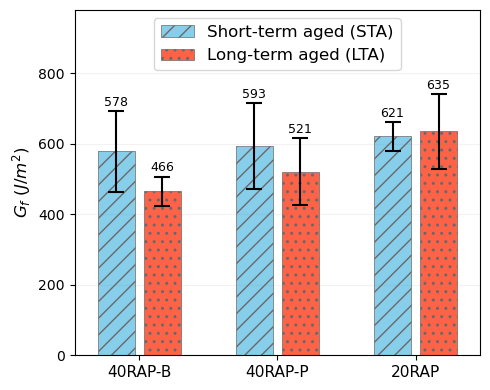

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.bar([1, 4, 7], height=DCT['Mean'].to_numpy()[:3], yerr=DCT['Std'].to_numpy()[:3], width=0.8, 
          edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Short-term aged (STA)',
          error_kw={'capsize': 6, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar([2, 5, 8], height=DCT['Mean'].to_numpy()[3:], yerr=DCT['Std'].to_numpy()[3:], width=0.8, 
          edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Long-term aged (LTA)',
          error_kw={'capsize': 6, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 980])
ax.set_xticks([1.5, 4.5, 7.5])
ax.set_xticklabels(['40RAP-B', '40RAP-P', '20RAP'], fontsize=11, color='k', rotation=0)
ax.set_ylabel('$G_f$ ($J$/$m^2$)', fontsize=12, fontweight='normal', color='k')
for i in range(3):
    ax.text([1, 4, 7][i], DCT['Mean'].to_numpy()[i]   + DCT['Std'].to_numpy()[i]   + 6, f"{DCT['Mean'].to_numpy()[i]:.0f}", 
            ha='center', va='bottom', fontsize=9)
    ax.text([2, 5, 8][i], DCT['Mean'].to_numpy()[i+3] + DCT['Std'].to_numpy()[i+3] + 6, f"{DCT['Mean'].to_numpy()[i+3]:.0f}", 
            ha='center', va='bottom', fontsize=9)
ax.set_xlim([0.1, 8.9])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=12, ncol=1, loc='upper center')
fig.tight_layout()
# fig.savefig('../_Figures/Figure10_DCT_Gf.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure10_DCT_Gf.pdf', format='pdf')
# fig.savefig('../_Figures/Figure10_DCT_Gf.svg', format='svg')

_______

## Plot 10: HWTT. 

Analysis and plot the results of the HWTT, including the raw data, corrected rut depth (CRD) and stripping inflection point (SIP).

Reading the raw data from `Data.xlsx` file. 

In [10]:
HWTT = pd.read_excel('./Data.xlsx', sheet_name='HWTT (raw data)', usecols='A:R', skiprows=2,
                     names=['L7R1p', 'L7R1r', 'L7R2p', 'L7R2r', 'L7R3p', 'L7R3r', 
                            'L8R1p', 'L8R1r', 'L8R2p', 'L8R2r', 'L8R3p', 'L8R3r', 
                            'L9R1p', 'L9R1r', 'L9R2p', 'L9R2r', 'L9R3p', 'L9R3r'])
HWTT.head()

,L7R1p,L7R1r,L7R2p,L7R2r,L7R3p,L7R3r,L8R1p,L8R1r,L8R2p,L8R2r,L8R3p,L8R3r,L9R1p,L9R1r,L9R2p,L9R2r,L9R3p,L9R3r
0,2,0.05,2,0.05,2,0.05,2,0.05,2,0.05,2,0.05,2,0.03,2,0.04,2,0.05
1,4,0.09,4,0.10,4,0.09,4,0.09,4,0.09,4,0.09,4,0.06,4,0.08,4,0.09
2,6,0.13,6,0.14,6,0.13,6,0.12,6,0.13,6,0.13,6,0.09,6,0.12,6,0.13
3,8,0.17,8,0.17,8,0.16,8,0.15,8,0.16,8,0.17,8,0.11,8,0.15,8,0.17
4,10,0.20,10,0.20,10,0.19,10,0.18,10,0.19,10,0.20,10,0.14,10,0.17,10,0.20


Plotting the rutting curves directly from the raw data. 

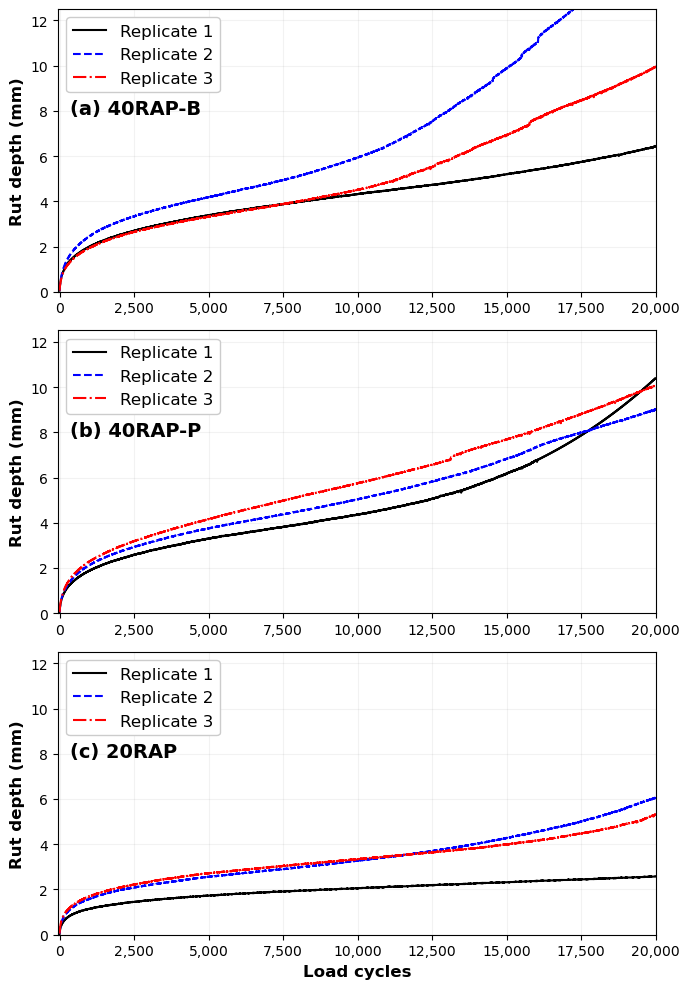

In [11]:
# Define plot properties. 
LS = ['-', '--', '-.'] * 3
LW = [1.5, 1.5, 1.5] * 3
Color = ['k', 'b', 'r'] * 3
lbl = ['(a) 40RAP-B', '(b) 40RAP-P', '(c) 20RAP']
# Plot the results.
fig, ax = plt.subplots(3, 1, figsize=(7, 10))
for i, ln in enumerate([7, 8, 9]):
    for j, rep in enumerate([1, 2, 3]):
        # extract the data. 
        X = HWTT[f'L{ln}R{rep}p'].to_numpy()
        Y = HWTT[f'L{ln}R{rep}r'].to_numpy()
        Indx = np.where(X != 0)[0]
        X = X[Indx]; Y = Y[Indx]
        # Plot the data. 
        ax[i].plot(X, Y, ls=LS[j], lw=LW[j], color=Color[j], label=f'Replicate {rep}')
    ax[i].set_xticks([2500 * i for i in range(9)])
    ax[i].set_xticklabels(['0', '2,500', '5,000', '7,500', '10,000', '12,500', '15,000', '17,500', '20,000'])
    ax[i].set_ylim([0, 12.5])
    ax[i].set_xlim([-50, 20000])
    ax[i].set_ylabel('Rut depth (mm)', fontsize=12, fontweight='bold', color='k')
    ax[i].legend(fontsize=12, loc='upper left', framealpha=1.0)
    ax[i].grid(which='both', color='gray', alpha=0.1)
    ax[i].text(0.02, 0.68, lbl[i], va='top', ha='left', transform=ax[i].transAxes, fontsize=14, fontweight='bold')
ax[2].set_xlabel('Load cycles', fontsize=12, fontweight='bold', color='k')
fig.tight_layout()
# fig.savefig('Figure11_HWTT_RuttingCurve.png', format='png', dpi=1000)
# fig.savefig('Figure11_HWTT_RuttingCurve.pdf', format='pdf')
# fig.savefig('Figure11_HWTT_RuttingCurve.svg', format='svg')

Reading the HWTT analyzed data from the `Data.xlsx` file. It is noted that this analysis was performed using the `AutoHWTT` program, developed at FHWA. 

In [13]:
# Read the analysis results. 
HWTTAnalysis = pd.read_excel(MainDataFile, sheet_name='HWTT (Analysis)', usecols='B:K', skiprows=2, 
                             names=['Property', 'L7R1', 'L7R2', 'L7R3', 'L8R1', 'L8R2', 'L8R3', 'L9R1', 'L9R2', 'L9R3'])
HWTTAnalysis.set_index('Property', inplace=True)
HWTTAnalysis

,L7R1,L7R2,L7R3,L8R1,L8R2,L8R3,L9R1,L9R2,L9R3
Property,,,,,,,,,
Bnumber,7103,7103,7103,7105,7105.000000,7105.000000,7115,7115,7115
Max_Rut_mm,6.39,15.85,9.91,7.05,8.970000,10.030000,2.54,6.02,5.27
Max_Pass,20000,20000,20000,16100,20000.000000,20000.000000,20000,20000,20000
RuttingAt10k_mm,4.245317,5.306432,4.188775,4.18889,4.788502,5.496299,2.037414,3.132322,3.296066
RuttingAt20k_mm,5.392655,6.770903,5.344103,5.395093,6.184564,7.269308,2.450743,3.888718,4.079767
SIP,15452.700894,14188.128517,13713.366069,11223.246648,13234.455646,14494.505742,17377.768998,14707.313767,16803.750456
SIP_Adj,22951.676593,12551.289123,15148.89257,18675.938448,16155.668040,16144.715823,39138.309324,21589.723562,22841.619036
StrippingNumber,10596,6330,6406,5662,6654.000000,8502.000000,14470,7434,12206
Stripping_Rutting_mm,0.997531,9.079573,4.565897,2.065669,2.786121,2.762451,0.099322,2.131889,1.19061


Plotting the CRD and SIP values for different mixtures. 

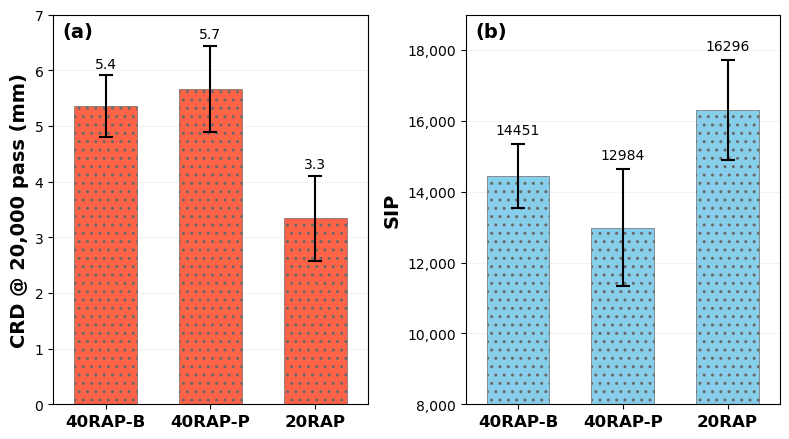

In [14]:
# Plot the rutting.
fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax1, ax2 = ax[0], ax[1]
# Save the chart so we can loop through the bars below.
# ----------------------------------------------------------------------------------------------------------------------
Xmean = [HWTTAnalysis.loc['Yin_CRD20', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].mean() for ln in [7, 8, 9]]
Xstd  = [HWTTAnalysis.loc['Yin_CRD20', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].std() for ln in [7, 8, 9]]
bar1 = ax1.bar(x=[1, 2, 3], height=Xmean, yerr=Xstd, width=0.6, 
               edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='CRD',
               error_kw={'capsize': 5, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
for i, bar in enumerate(bar1):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + Xstd[i] + 0.08, f'{bar.get_height():.1f}', 
             ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')
ax1.set_ylabel('CRD @ 20,000 pass (mm)', color='k', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 7])
ax1.text(0.03, 0.98, '(a)', transform=ax1.transAxes, ha='left', va='top', fontsize=14, fontweight='bold')
# ----------------------------------------------------------------------------------------------------------------------
Smean = [HWTTAnalysis.loc['SIP', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].mean() for ln in [7, 8, 9]]
Sstd  = [HWTTAnalysis.loc['SIP', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].std() for ln in [7, 8, 9]]
bar2 = ax2.bar(x=[1, 2, 3], height=Smean, yerr=Sstd, width=0.6, 
               edgecolor='dimgray', lw=0.5, color='skyblue', hatch='..', label='Lane 7',
               error_kw={'capsize': 5, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
for i, bar in enumerate(bar2):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + Sstd[i] + 200, f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')
ax2.set_ylabel('SIP', color='k', fontsize=14, fontweight='bold')
ax2.set_ylim([8000, 19000])
ax2.set_yticks([8000 + 2000 * i for i in range(6)])
ax2.set_yticklabels(['8,000', '10,000', '12,000', '14,000', '16,000', '18,000'], fontsize=10)
ax2.text(0.03, 0.98, '(b)', transform=ax2.transAxes, ha='left', va='top', fontsize=14, fontweight='bold')
# ----------------------------------------------------------------------------------------------------------------------
for ax in [ax1, ax2]:
    # ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', alpha=0.1)
    ax.xaxis.grid(False)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['40RAP-B', '40RAP-P', '20RAP'], fontsize=12, fontweight='bold')
    ax.set_xlim([0.5, 3.5])
fig.tight_layout()
# fig.savefig('../_Figures/Figure12_HWTT_CRD_SIP.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure12_HWTT_CRD_SIP.pdf', format='pdf')
# fig.savefig('../_Figures/Figure12_HWTT_CRD_SIP.svg', format='svg')

Perform the statistical analysis to evaluate whether the RA-modified mixtures has significantly different CRD or SIP values that those of control mixture. 

In [15]:
# Calculate the significance of CRD and SIP.
_, CRD_pvalue = ttest_ind(np.array([HWTTAnalysis.loc['Yin_CRD20', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].to_list() for ln in [7, 8]]).ravel(),
                          np.array([HWTTAnalysis.loc['Yin_CRD20', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].to_list() for ln in [9]]).ravel())
_, SIP_pvalue = ttest_ind(np.array([HWTTAnalysis.loc['SIP', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].to_list() for ln in [7, 8]]).ravel(),
                          np.array([HWTTAnalysis.loc['SIP', [f'L{ln}R{rep}' for rep in [1, 2, 3]]].to_list() for ln in [9]]).ravel())
print(f'CRD of RA-modified vs Control: {CRD_pvalue:.3f}')
print(f'SIP of RA-modified vs Control: {SIP_pvalue:.3f}')

CRD of RA-modified vs Control: 0.003
SIP of RA-modified vs Control: 0.038
